# Bengaluru House Data Analysis

## Exploring Data

In [1746]:
#Import neccessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor



In [1747]:
# read data
df=pd.read_csv(r'C:\Users\HP-PC\Desktop\Projects\Machine Learning\Bengaluru_House_Data\Bengaluru_House_Data.csv')

In [1748]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [1749]:
df.shape

(13320, 9)

## Data Cleaning

In [1750]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [1751]:
#check null values
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [1752]:
#delete unwanted data
df=df.drop(columns=['area_type','availability','society','balcony'])

In [1753]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [1754]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [1755]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [1756]:
#location has contain only one null value so fill it from maximum count values
df['location']=df['location'].fillna('Whitefield')

In [1757]:
df.isna().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [1758]:
#fill null value from mode of size
df['size']=df['size'].fillna(df['size'].mode())
#fill null value from mediun of bath
df['bath']=df['bath'].fillna(df['bath'].median())

In [1759]:
# df = df.dropna()
# df.isna().sum()

In [1760]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [1761]:
#Solve the problem of BHK And bedroom

df['BHK']=df['size'].str.split().str.get(0).fillna(0).astype(int)

#df['BHK']=df['size'].str.split().str.get(0).astype(int)
#df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [1762]:
df['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9,  0, 27, 10, 19, 16, 43, 14,
       12, 13, 18])

In [1763]:
df[df.BHK > 20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


It has 27 bedroom with 8000 total_sqft this looks like an error and we will deal with in outlier section

In [1764]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [1765]:
# create function for change "1133 - 1384" type of data to its mean value
def set_range(data):
    temp=data.split('-')
    if(len(temp)>1):
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(data)
    except:
        return None

In [1766]:
#call function
df['total_sqft']=df['total_sqft'].apply(set_range)

In [1767]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [1768]:
# price is in lakh so find price per square fit

df['price_per_sqft']=df['price']*100000/df['total_sqft']
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [1769]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.800375,7.907501e+03
std,1238.405258,1.338754,148.971674,1.297835,1.064296e+05
min,1.000000,1.000000,8.000000,0.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [1770]:
df['location'].value_counts()

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [1771]:
len(df.location.unique())

1305

### 
- We have 1305 unique features which is huge. Usually for character text, we use encoding, but here the number is too big & encoding would not be appropriate. This is called 'Dimensionality Curse' or High Dimensionality Problem.

- To deal with it, we can convert some location to 'Other'Category. Locations which haas 1-2 data points, we will convert it to 'Other' category

- Next, we see how many data points are available for location

In [1772]:
df['location']=df['location'].apply(lambda x:x.strip())
df['location'].value_counts()

Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [1773]:
loc = df.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [1774]:
loc

location
Whitefield               542
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1294, dtype: int64

### Feature Engineering & Dimensionality Reduction Techniques

In [1775]:
len(loc[loc<=10])

1053

In [1776]:
loc_less_than_10 =  loc[loc<=10]

In [1777]:
len(df.location.unique())

1294

In [1778]:
 #converting to 'Other' those count value is less than 11
df.location = df['location'].apply(lambda x: 'Other' if x in loc_less_than_10 else x)

In [1779]:
len(df.location.unique())

242

### Outlier Detection & Removal

In [1780]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.800375,7.907501e+03
std,1238.405258,1.338754,148.971674,1.297835,1.064296e+05
min,1.000000,1.000000,8.000000,0.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [1781]:
(df['total_sqft']/df['BHK']).describe()

count    1.327400e+04
mean              inf
std               NaN
min      2.500000e-01
25%      4.733333e+02
50%      5.525000e+02
75%      6.250000e+02
max               inf
dtype: float64

In [1782]:
df.shape

(13320, 7)

In [1783]:
df[(df['total_sqft']/df['BHK'])<300]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [1784]:
#df=df[(df['total_sqft']/df['BHK'])<300]
df = df[~(df.total_sqft/df.BHK <300)]

In [1785]:
df.shape

(12576, 7)

In [1786]:
#describe function gives you some basic statistics on that particular column
df.price_per_sqft.describe() 

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Lowest price per sqft is ~267 Rs v/s costliest property is ~176470. We will remove such extreme cases using standard deviation function.

In [1787]:
#Function to remove price_per_sqft outlier
def remove_outliers_sqft(df):
    df_output=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        
        st=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st)) ]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
    return df_output

df=remove_outliers_sqft(df)
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.573925,5659.062876
std,880.694214,0.979449,86.342786,0.899350,2265.774749
min,300.000000,1.000000,10.000000,0.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [1788]:
df.shape

(10301, 7)

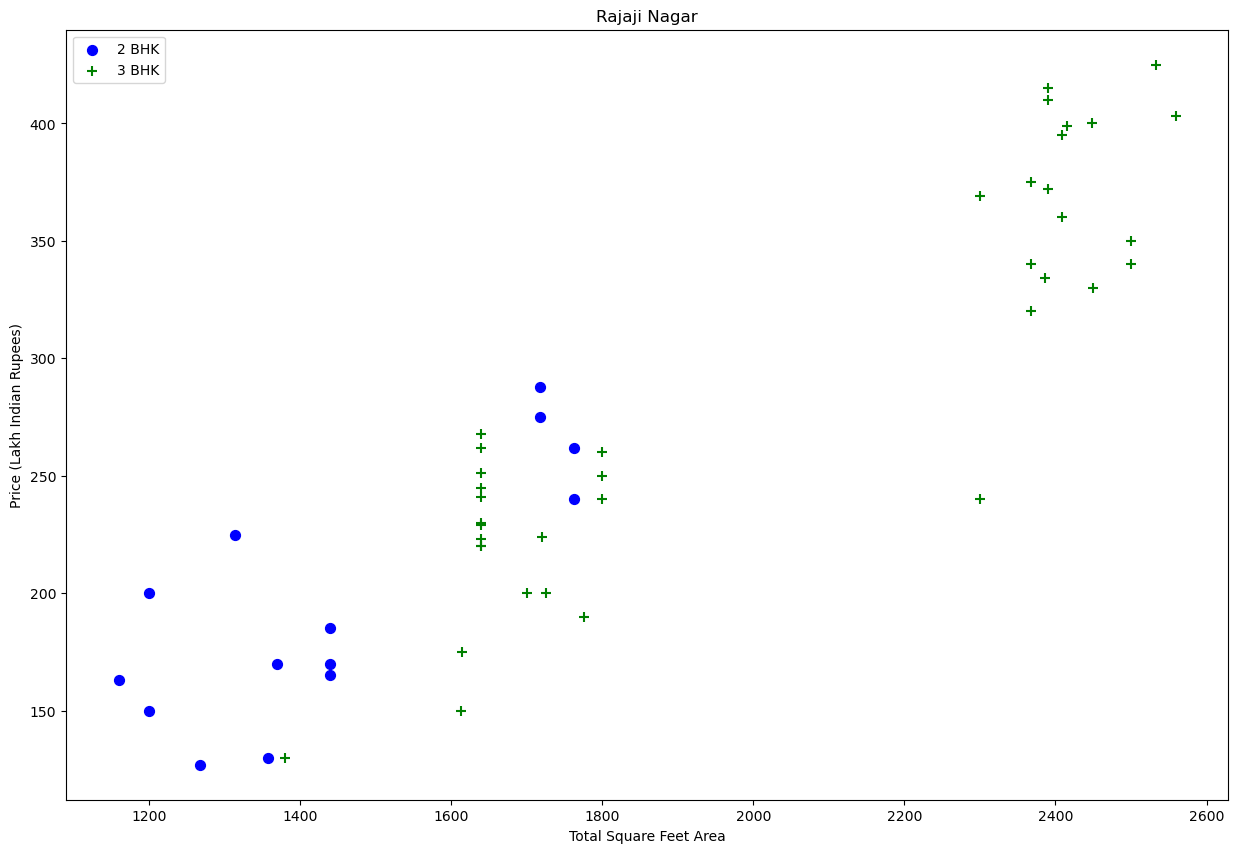

In [1789]:
#Function to visualize prices between 2 & 3BHK
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    mpl.rcParams['figure.figsize'] = (15,10)
    mpl.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    mpl.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    mpl.xlabel("Total Square Feet Area")
    mpl.ylabel("Price (Lakh Indian Rupees)")
    mpl.title(location)
    mpl.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")



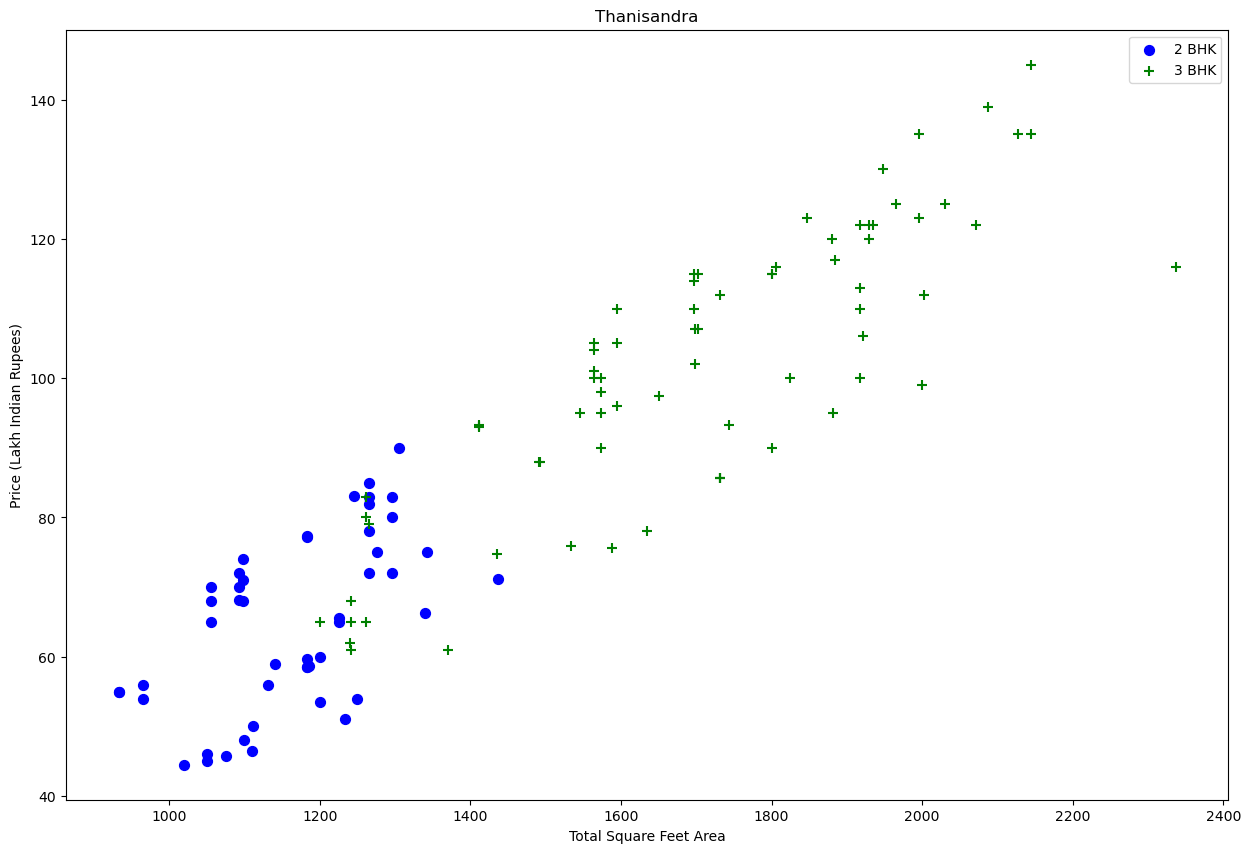

In [1790]:
plot_scatter_chart(df,"Thanisandra")

In [1791]:
#Function to remove outliers
def remove_outliers_bhk(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
                
        

In [1792]:
df=remove_outliers_bhk(df)

In [1793]:
df.shape

(7363, 7)

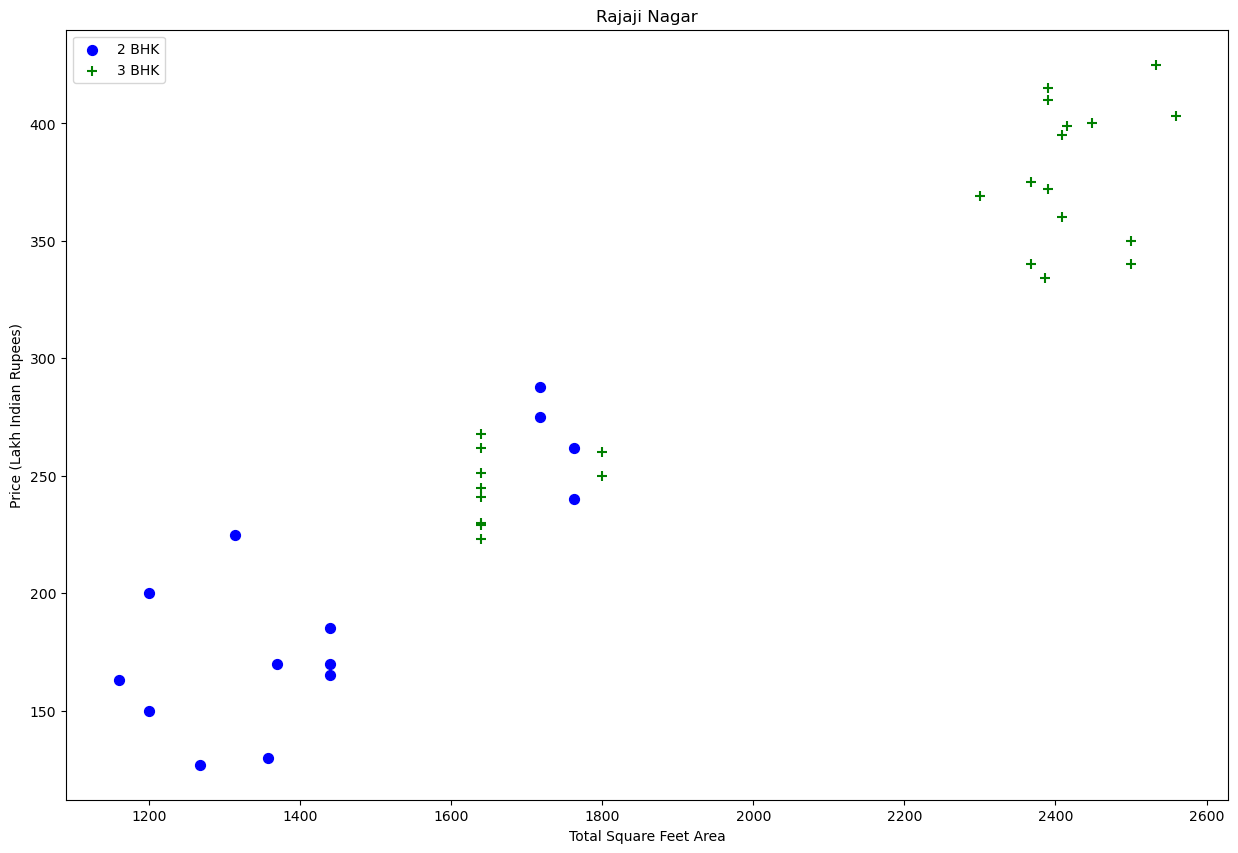

In [1794]:
plot_scatter_chart(df,"Rajaji Nagar")

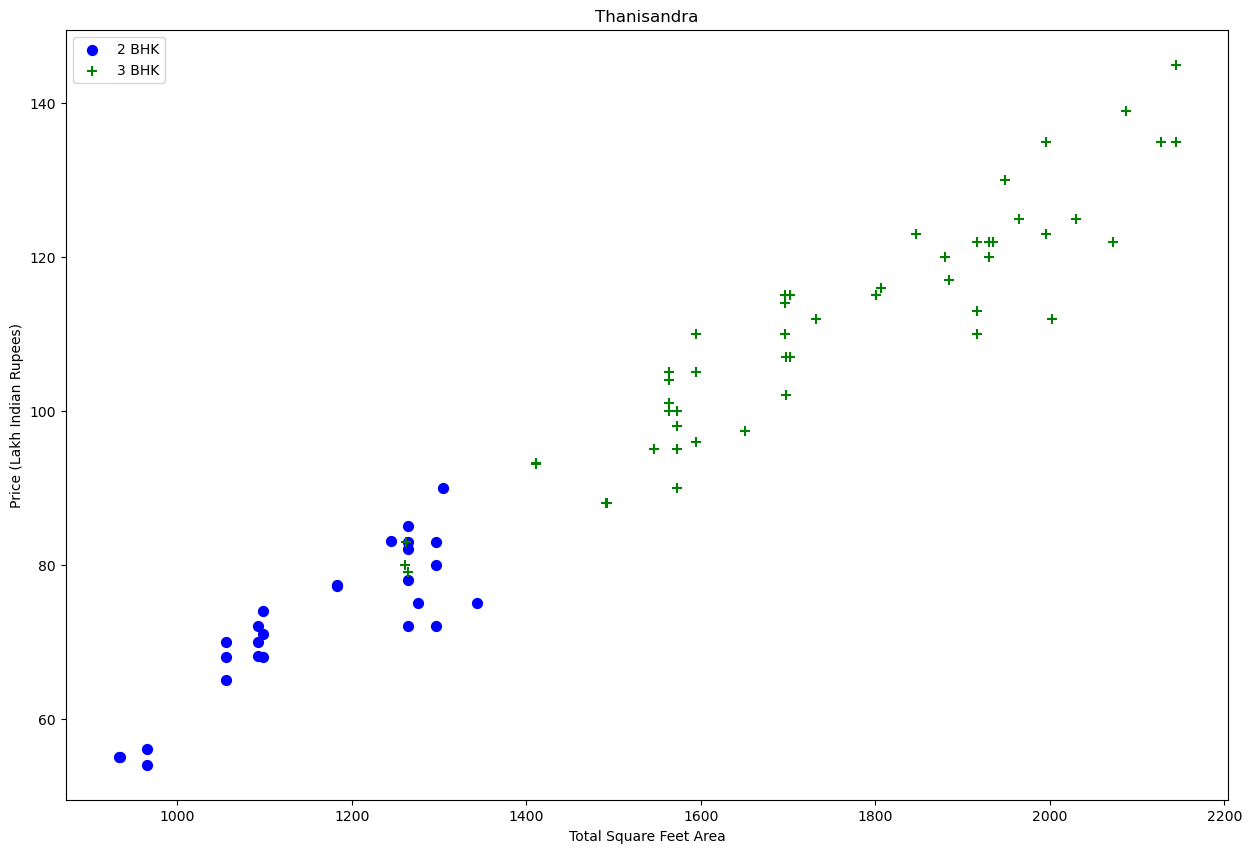

In [1795]:
plot_scatter_chart(df,"Thanisandra")

Text(0, 0.5, 'Count')

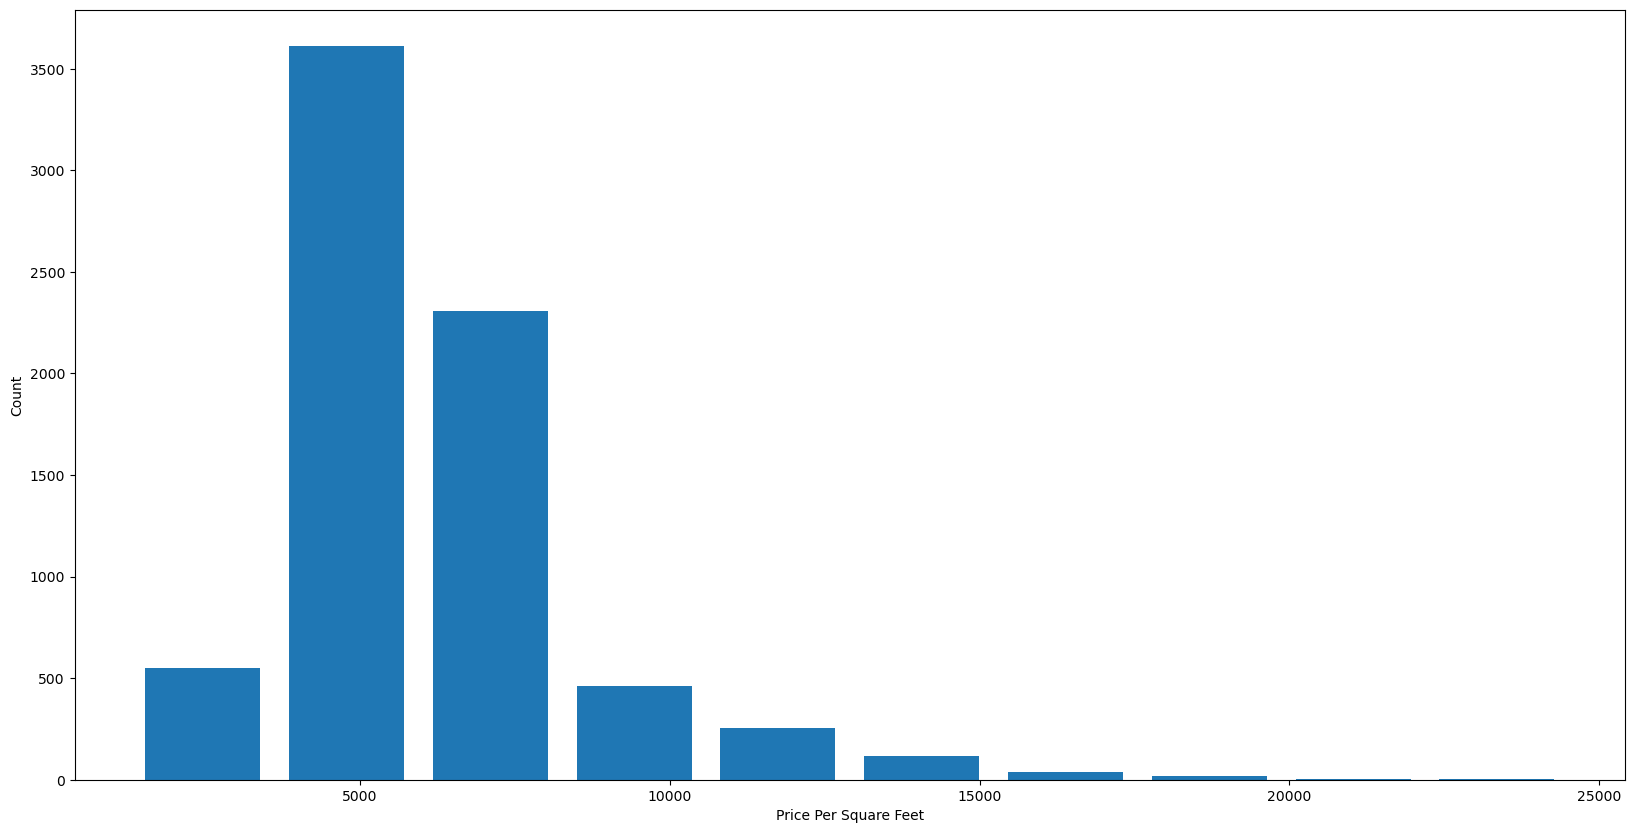

In [1796]:
mpl.rcParams["figure.figsize"] = (20,10)
mpl.hist(df.price_per_sqft,rwidth=0.8)
mpl.xlabel("Price Per Square Feet")
mpl.ylabel("Count")

In [1797]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

The bathroom should not be greater than total room plus two extra bathroom

In [1798]:
df[df.bath>df.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5274,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5887,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9064,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [1799]:
df.shape

(7363, 7)

In [1800]:
df=df[df.bath<df.BHK+2]
df.shape

(7279, 7)

In [1801]:
other_locations = df[df['location'] == 'Other']
other_locations

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5415,Other,3 BHK,2770.0,4.0,290.0,3,10469.314079
5418,Other,1 BHK,600.0,1.0,38.0,1,6333.333333
5421,Other,2 BHK,1500.0,2.0,185.0,2,12333.333333
5422,Other,2 BHK,840.0,2.0,45.0,2,5357.142857
5423,Other,3 Bedroom,4395.0,3.0,240.0,3,5460.750853
...,...,...,...,...,...,...,...
7711,Other,2 BHK,1200.0,2.0,70.0,2,5833.333333
7712,Other,1 BHK,1800.0,1.0,200.0,1,11111.111111
7715,Other,2 BHK,1353.0,2.0,110.0,2,8130.081301
7716,Other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [1802]:
df['location'].shape

(7279,)

ML algorithm cannot interpret text data,so need to use encoding to convert 'location'

In [1803]:
dum = pd.get_dummies(df.location)
dum

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1804]:
#To avoid dummy trap, we drop one column. For dummies, we should have one less column
df = pd.concat([df, dum.drop('Other', axis = 1)], axis = 1)

df.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1805]:
#df.drop(columns=['size'], inplace=True)
df = df.drop(['price_per_sqft','location', 'size'],axis="columns")

In [1806]:
df.tail()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
10290,1195.0,2.0,100.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10291,1692.0,3.0,108.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10293,2500.0,5.0,185.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10298,1855.0,3.0,135.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10299,1876.0,3.0,160.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Applying ML Algorithms

In [1807]:
X = df.drop('price', axis = "columns")
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1808]:
y = df.price

In [1809]:
#using test train split method
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [1810]:
#Creating Linear Regression model
#from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8581243630766049

In [1811]:
# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.77999663, 0.84305074, 0.79703544, 0.83240198, 0.84899097,
       0.86241519, 0.83645813, 0.8023053 , 0.83385349, 0.83155605])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

### Find best model using GridSearchCV

In [1812]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


,model,best_score,best_params
0,linear_regression,0.821171,{'fit_intercept': False}
1,lasso,0.681039,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.736833,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [1813]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [1814]:
np.where(X.columns=='6th Phase JP Nagar')[0][0]

9

Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

### Testing model for properties

In [1815]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [1816]:
predict_price('2nd Stage Nagarbhavi', 1000, 2, 2)

182.2383868759017

In [1817]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

83.44136795775886

In [1818]:
predict_price('6th Phase JP Nagar', 1000, 3, 3)

66.35735985723396

In [1819]:
predict_price('Thanisandra', 1000, 3, 3)

56.23675038079